  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=4b76ea8f9378eaf25ece0d1491e3470175f788e2a2c757f6e06b30ba3003698b
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [2]:
import pandas as pd


air_quality_data = pd.read_csv('/content/AirQuality.csv', delimiter=';')

# Step 3: Data Cleaning
# Replace commas in numeric columns and drop unnecessary columns
air_quality_data = air_quality_data.replace({',': '.'}, regex=True)
air_quality_data = air_quality_data.drop(columns=["Unnamed: 15", "Unnamed: 16"])
air_quality_data.iloc[:, 2:] = air_quality_data.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
air_quality_data = air_quality_data.dropna()

# Step 4: Preprocessing (Normalization)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = air_quality_data.iloc[:, 2:].values  # Selecting only the numeric columns
data_scaled = scaler.fit_transform(data)

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=3788e954089b2271cd90e4a8891c6a2bc0d3d50fbd44d4c05876473523cd2470
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


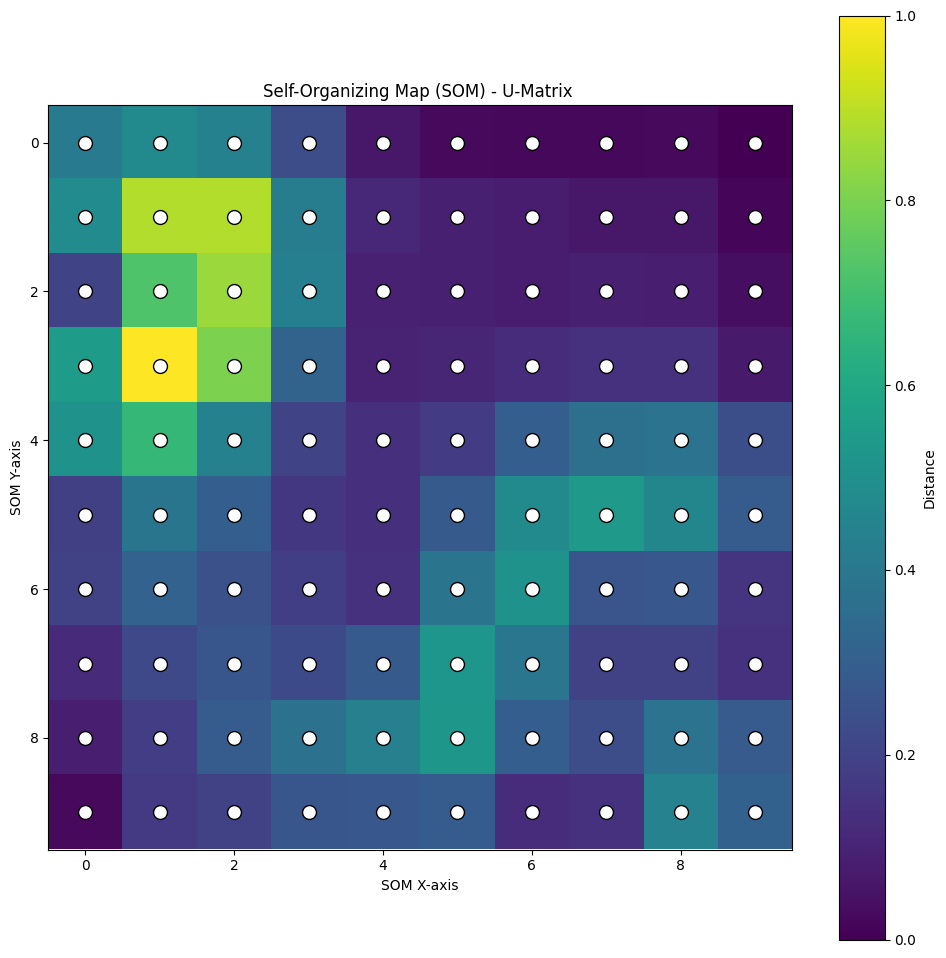

In [3]:
# Step 5: Install MiniSom
!pip install minisom

# Step 6: Import the necessary libraries
from minisom import MiniSom
import numpy as np

# Step 7: Initialize and train the SOM
som_size = (10, 10)  # Grid size
som = MiniSom(som_size[0], som_size[1], data_scaled.shape[1], sigma=1.0, learning_rate=0.5)

som.random_weights_init(data_scaled)
som.train_random(data_scaled, 1000)

from matplotlib import pyplot as plt
import numpy as np
# Assuming `som` is your trained Self-Organizing Map and you have the U-Matrix calculated
u_matrix = som.distance_map()  # Get the U-Matrix

# Set up the figure size
plt.figure(figsize=(12, 12))

# Plot the U-Matrix using a different colormap (e.g., 'viridis')
plt.imshow(u_matrix, cmap='viridis', interpolation='nearest')

# Optionally, add data points (e.g., red circles for air quality measurements)
for x in range(som.get_weights().shape[0]): # get x dimension from som.get_weights().shape
    for y in range(som.get_weights().shape[1]): # get y dimension from som.get_weights().shape
        # If you want to plot the markers, ensure they correspond to your data
        # Replace the following condition with your logic to decide where to plot
        plt.scatter(x, y, marker='o', color='white', edgecolor='black', s=100)  # Example marker

# Add a colorbar for reference
plt.colorbar(label='Distance')

# Add labels
plt.title('Self-Organizing Map (SOM) - U-Matrix ')
plt.xlabel('SOM X-axis')
plt.ylabel('SOM Y-axis')

# Show the plot
plt.show()